In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r'C:\Users\ASUS\Downloads\03f4d1c1a55947025601.csv'
data = pd.read_csv(file_path)



In [11]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())



Missing values per column:
 temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64


In [12]:
# Handle missing values (impute with mean)
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)



In [13]:
# Feature scaling (excluding target variable)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(data_imputed.drop(columns=['generated_power_kw'])), 
                        columns=data_imputed.drop(columns=['generated_power_kw']).columns)


In [14]:

# Prepare the data
X = X_scaled
y = data_imputed['generated_power_kw']



In [15]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
# Model building
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:

# Model predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [18]:

# Print evaluation metrics
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.4f}')



Mean Squared Error: 257589.06
Mean Absolute Error: 391.79
R-squared: 0.7180


In [19]:
# Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)




In [20]:
# Display top 5 important features
print("\nTop 5 most influential features on solar power generation:\n", 
      feature_importance.head())




Top 5 most influential features on solar power generation:
                               Feature  Coefficient
9   shortwave_radiation_backwards_sfc   344.412798
10          wind_speed_10_m_above_gnd   164.202435
2         mean_sea_level_pressure_MSL   113.868057
12          wind_speed_80_m_above_gnd   109.646402
11      wind_direction_10_m_above_gnd    32.155925


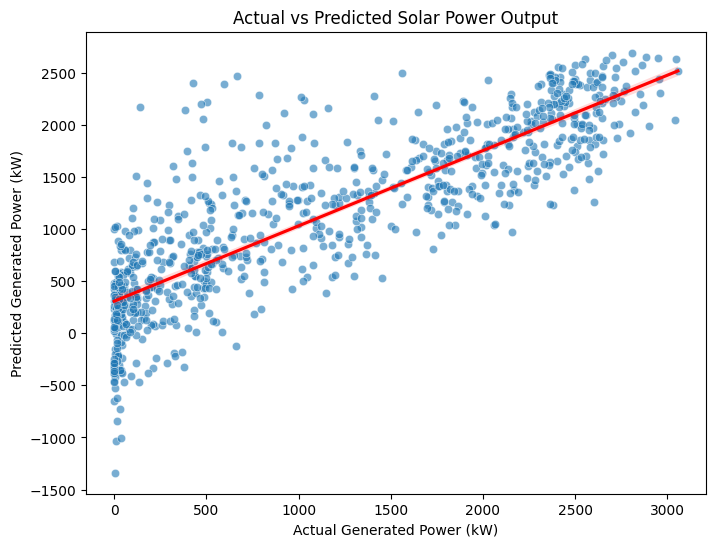

In [21]:
# Plot actual vs predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red')  # Add regression line
plt.xlabel('Actual Generated Power (kW)')
plt.ylabel('Predicted Generated Power (kW)')
plt.title('Actual vs Predicted Solar Power Output')
plt.show()